# Intro
* In this notebook, I will practice the following skills:
    * text cleansing, including stem / lem
    * X1: Tokenize / CountVectorizer
    * X2: tfidf
    * X3: word2vec
    * Brief Sentimental Analysis (Compare the above three methods)
* Reference:
    * Most contents are based on this: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

# Import packages

In [1]:
# https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import re

pd.set_option('max_colwidth', 500)

from tqdm import tqdm
tqdm.pandas()

import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.keyedvectors import KeyedVectors
import spacy

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from utils.cleansing import text_cleansing, swem_agg_vector, cos_similarity

/Users/yao/miniconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [5]:
df = pd.read_csv('./data/IMDB_Dataset.csv')  # The data is from : https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Tokenize
* Tokenize the text and see the distribution

## word_tokenize

In [23]:
# Tokenize one of the text, and see the result
text = df['review'].iloc[0]
text

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
# Tokenize one of the text, and see the result
tokenized_word=word_tokenize(text_cleansing(text))
print(tokenized_word)

['one', 'reviewer', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right', 'exactly', 'happen', 'methe', 'first', 'thing', 'strike', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'star', 'dodgy', 'deal', 'shady', 'agreement', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'for

## Distribution plot

fdist = <FreqDist with 139 samples and 168 outcomes>


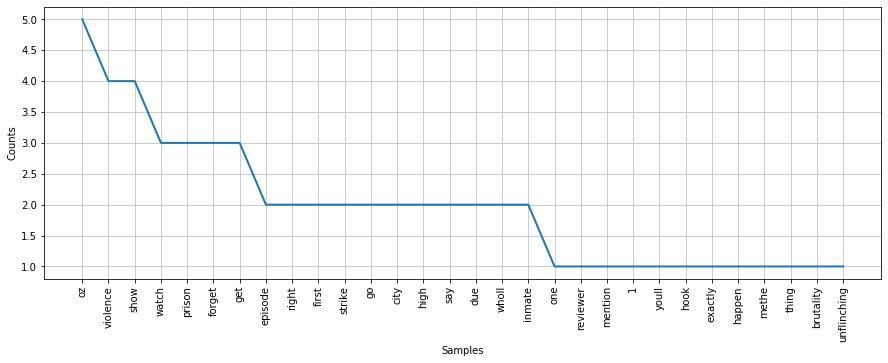

In [9]:
# Tokenize one of the text, and see the result
# Distribution Plot
# Ref: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
fdist = FreqDist(tokenized_word)
print('fdist = {}'.format(fdist))

# Frequency Distribution Plot
plt.figure(figsize=(15, 5)) # figureの縦横の大きさ
fdist.plot(30,cumulative=False)
plt.show()

# text cleansing function

In [22]:
# check:  utils.cleansing.text_cleansing
text_cleansing("don't haven't not reviewers studies studying study wanted want wanna code go went gone better good connection connect connected connecting flies fly",
              is_including_nons=False), text_cleansing("don't haven't not reviewers studies studying study wanted want wanna code go went gone better good connection connect connected connecting flies fly",
              is_including_nons=True)

('reviewer study study study want want wanna code go go go better good connection connect connect connect fly fly',
 'dont havent not reviewer study study study want want wanna code go go go better good connection connect connect connect fly fly')

In [7]:
%%time
#df['review_clean'] = df['review'].map(lambda x: text_cleansing(x))
df['review_clean'] = df['review'].progress_map(lambda x: text_cleansing(x))
df['review_clean_non_include'] = df['review'].progress_map(lambda x: text_cleansing(x, True))

100%|██████████| 50000/50000 [01:17<00:00, 648.50it/s]

CPU times: user 2min 45s, sys: 3.74 s, total: 2min 48s
Wall time: 2min 51s


In [30]:
df.head()

,review,sentiment,review_clean,review_clean_non_include
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch 1 oz episode hooked...,one reviewer mention watch 1 oz episode hooked...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake think ...,basically theres family little boy jake think ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stun f...,petter matteis love time money visually stun f...


# Sentiment Analysis
* The original data includes "sentiment" column. Use it to make sentiment prediction.

In [59]:
# Make dummy variable for sentiment nominal variable
df['sentiment_v'] = df['sentiment'].map(lambda x: 1 if x == 'positive' else 0)

In [41]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## CountVectorizer (Bow)
* Data-Cleansing for all the text
* Use CountVectorizer to count each token

In [59]:
# Compare across essays with CountVectorizer : Bag-of-words model(BoW ) 
# ref: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

#tokenizer to remove unwanted elements from out data like symbols and numbers
cv = CountVectorizer()
text_counts = cv.fit_transform(df['review_clean'])

In [60]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
cv_n = CountVectorizer()
text_counts_non_include = cv_n.fit_transform(df['review_clean_non_include'])

In [62]:
text_counts_non_include.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Model Fitting

In [43]:
# Split Data to test / train data
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['sentiment_v'], stratify=df['sentiment_v'], test_size=0.3, random_state=1)

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    text_counts_non_include, df['sentiment_v'], stratify=df['sentiment_v'], test_size=0.3, random_state=1)

In [44]:
y_train.value_counts(), y_test.value_counts(), y_train_n.value_counts(), y_test_n.value_counts()

(1    17500
 0    17500
 Name: sentiment_v, dtype: int64,
 1    7500
 0    7500
 Name: sentiment_v, dtype: int64,
 1    17500
 0    17500
 Name: sentiment_v, dtype: int64,
 1    7500
 0    7500
 Name: sentiment_v, dtype: int64)

In [46]:
%%time
# Use random forest
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier_n = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
rf_classifier_n.fit(X_train_n, y_train_n)

CPU times: user 8min 31s, sys: 1.4 s, total: 8min 33s
Wall time: 8min 34s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Difference between "including non-words" and "without non-words"
* The following analysis will investigate the diffrence between "including non-words" and "without non-words"

In [47]:
%%time
# Evaluation  (no not_list)
rf_classifier.score(X_test, y_test)  # ACC

CPU times: user 1.77 s, sys: 9.17 ms, total: 1.78 s
Wall time: 1.79 s


0.8536

In [48]:
%%time
# Evaluation  (with not_list)
rf_classifier_n.score(X_test_n, y_test_n)  # ACC

CPU times: user 1.66 s, sys: 7 ms, total: 1.67 s
Wall time: 1.67 s


0.8512666666666666

In [49]:
# classification_report  (no not_list)
print(classification_report(y_test, rf_classifier.predict(X_test), target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7500
    positive       0.85      0.85      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [50]:
# classification_report  (with not_list)
print(classification_report(y_test_n, rf_classifier_n.predict(X_test_n), target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      7500
    positive       0.86      0.84      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



* 1 % better (By including non-words can make the sentiment prediction a little bit better ?)

In [51]:
# Self test (The text that wanna try myself)
self_case = [
    "I do not like this movie. It's very dark and blue. I hope they can insert more interesting plots.",
    "I dislike the movie. Dark and heavy. They should change the plot more. The plot goes to rapidly. Get offended. Awful dialogue.",
    "I like this movie. It's very energetic.",
    'It is the best movie I have ever watched before',
    'Well, not good and not bad. Just feel the director had pay a lot of effort to the movie. I like the main actor though.'
]

In [53]:
text_cleaned_list = []
text_cleaned_non_list = []
for text in self_case:
    text_cleaned = text_cleansing(text)
    text_cleaned_list.append(text_cleaned)
    
    text_cleaned_n = text_cleansing(text, True)
    text_cleaned_non_list.append(text_cleaned_n)    

In [54]:
# (no not_list)
text_cleaned_list

['like movie dark blue hope insert interest plots',
 'dislike movie dark heavy change plot more plot go rapidly get offended awful dialogue',
 'like movie energetic',
 'best movie ever watch',
 'well good bad feel director pay lot effort movie like main actor though']

In [63]:
# (no not_list)
rf_classifier.predict(cv.transform(text_cleaned_list))    # negative=0, positive=1

array([1, 0, 1, 1, 0])

In [65]:
# (with not_list)
text_cleaned_non_list

['not like movie dark blue hope insert interest plots',
 'dislike movie dark heavy change plot more plot go rapidly get offended awful dialogue',
 'like movie energetic',
 'best movie ever watch',
 'well not good not bad feel director pay lot effort movie like main actor though']

In [66]:
# (with not_list)
rf_classifier_n.predict(cv_n.transform(text_cleaned_non_list))   # negative=0, positive=1

array([1, 0, 1, 1, 0])

* There is not big difference here. It's better to invetigate the original dataset to explore more.

## Bow - spaCy

In [80]:
import spacy


nlp = spacy.load("en_core_web_sm")
text = "Apple thought about buying U.K. startup for $1 billion. I was born in Saitama. The gender discrimination. \
       San Francisco considers banning sidewalk delivery robots. \
       FB is hiring a new VP of global policy."
doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop, token.norm_)

Apple apple PROPN NNP nsubj Xxxxx True False apple
thought think VERB VBD ROOT xxxx True False thought
about about ADP IN prep xxxx True True about
buying buy VERB VBG pcomp xxxx True False buying
U.K. u.k. PROPN NNP compound X.X. False False u.k.
startup startup NOUN NN dobj xxxx True False startup
for for ADP IN prep xxx True True for
$ $ SYM $ quantmod $ False False $
1 1 NUM CD compound d False False 1
billion billion NUM CD pobj xxxx True False billion
. . PUNCT . punct . False False .
I -PRON- PRON PRP nsubjpass X True False i
was be VERB VBD auxpass xxx True True was
born bear VERB VBN ROOT xxxx True False born
in in ADP IN prep xx True True in
Saitama saitama PROPN NNP pobj Xxxxx True False saitama
. . PUNCT . punct . False False .
The the DET DT det Xxx True False the
gender gender NOUN NN compound xxxx True False gender
discrimination discrimination NOUN NN ROOT xxxx True False discrimination
. . PUNCT . punct . False False .
                SPACE _SP       False False       

In [56]:
doc.ents

(Apple, U.K., $1 billion, Saitama, San Francisco, VP)

In [57]:
list(doc.noun_chunks)

[Apple,
 U.K. startup,
 I,
 Saitama,
 The gender discrimination,
 sidewalk delivery robots,
 FB,
 a new VP,
 global policy]

In [58]:
[token.lemma_ for token in doc                # lower case; lemmitization
 if token.pos_ in ['NOUN', 'PROPN', 'VERB', 'ADJ']   # remove numbers and punctuation
               and token.is_stop == False]    # stop words

['apple',
 'think',
 'buy',
 'u.k.',
 'startup',
 'bear',
 'saitama',
 'gender',
 'discrimination',
 'san',
 'francisco',
 'consider',
 'ban',
 'sidewalk',
 'delivery',
 'robot',
 'fb',
 'hire',
 'new',
 'vp',
 'global',
 'policy']

In [81]:
# compare
text_cleansing(text)

'apple think buy uk startup 1 billion bear saitama gender discrimination san francisco consider ban sidewalk delivery robot fb hire new vp global policy'

* In sum, using spaCy is easier than using the cleansing function.

## tfidf Analysis

In [70]:
vectorizer = TfidfVectorizer(use_idf=True)
csr_matrix = vectorizer.fit_transform(df['review_clean'])
csr_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    csr_matrix, df['sentiment_v'], stratify=df['sentiment_v'], test_size=0.3, random_state=1)

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [74]:
print(classification_report(y_test, rf_classifier.predict(X_test), target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7500
    positive       0.85      0.85      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



## word2vec

In [52]:
vector_path = './bin/GoogleNews-vectors-negative300.bin'
word2vec_base = KeyedVectors.load_word2vec_format(vector_path, binary=True)

In [69]:
# essay vectorization (300 components)
essay_vectors = []
for essay in df['review_clean']:
    essay_vectors.append(swem_agg_vector(essay.split(' '), word2vec_base, 'avg'))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    essay_vectors, df['sentiment_v'], stratify=df['sentiment_v'], test_size=0.3, random_state=1)

In [71]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
print(classification_report(y_test, rf_classifier.predict(X_test), target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.81      0.80      0.80      7500
    positive       0.80      0.81      0.81      7500

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



The result is worser.
I will investigate a little bit here. (Check the vectors and calculate the cosine similarity)

### Check the similarity first (Cosine Similarity)

In [135]:
target_index = 0

cosine_distance = {}
for idx in range(len(essay_vectors)):
    cosine_distance[idx] = cos_similarity(essay_vectors[idx], essay_vectors[target_index])

cosine_distance_df = pd.DataFrame.from_dict(cosine_distance, orient='index', columns=['d'])
top_N_idx = cosine_distance_df.sort_values(ascending=False, by='d').index[:10]
df[['review', 'review_clean','sentiment']].iloc[top_N_idx]

,review,review_clean,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...",one reviewer mention watch 1 oz episode hooked right exactly happen methe first thing strike oz brutality unflinching scene violence set right word go trust me show faint hearted timid show pull punch regard drugs sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians iris...,positive
25999,"HBO created this show for purposes of making us see the most realistic view of prison possible and they did a hell of a job. Oz was created by the creators of Homicide who wanted to show a raw version of prison. This show is what launched the idea of every other HBO Original Program such as The Sopranos, Sex and the City, The Wire, Arliss, Deadwood, and Six Feet Under amongst others. Oz is the nickname for the Oswald State Penetentiary, a fictional prison in some US state which is never stat...",hbo create show purpose make u see realistic view prison possible hell job oz create creator homicide want show raw version prison show launch idea every hbo original program sopranos sex city wire arliss deadwood six foot amongst others oz nickname oswald state penetentiary fictional prison u state never state though accents crime scenes racial distribution ny assumed main prison unit look show emerald city seemingly ideal prison unit privlages others think liberal unit manager name tim mcm...,positive
37257,"Please humour me if you will, for a minute while I read you the back of the ALLEY CAT VHS box. It says that:<br /><br />In this part of the city every street is a dead end- on every corner something to buy- in every alley another way to die- To survive you're got to be the best- just like the Alley Cat. Alley Cat- this lady owns the night. On the streets where even the predators become victims she knows how to survive- Cross her and you've run out of luck. Alley Cat- This animal is aroused.<...",please humour will minute read back alley cat vhs box say thatin part city every street dead end every corner something buy every alley another way die survive get best like alley cat alley cat lady own night street even predator become victim know survive cross run luck alley cat animal arousednow one pathetic blurb ever hear life whoever write must insane think awful description could tempt u view video yet unfortunately whichever faceless individual responsible tragic use english job well...,negative
10434,"Well where to start here? Straightheads presents me with a bit of a dilemma. Had this film come out of Italy in, say, 1975, been directed by Ruggero Deodatto and starred David Hess, then I'd be lapping it up faster than Labrador drinks water on a summer's day. Because whilst Tarantino and Rodriguez are busy elsewhere with their homage to grindhouse cinema, Dan Reed has produced a rape/revenge grindhouse picture of his very own in England, and on seemingly the same budget as it would have tak...",well start here straightheads present bite dilemma film come italy in say 1975 direct ruggero deodatto star david hess id lap faster labrador drink water summers day whilst tarantino rodriguez busy elsewhere homage grindhouse cinema dan reed produce raperevenge grindhouse picture england seemingly budget would take rodriguez turn rise mcgowans leg machine gun want play grindhouse bingo let call numbers 1 rich h

* It seems that the aggregation of word2vec of each essay does not function very well here.
    * The Cosine similarity is not related to sentiment very much.

#### similarity (distance) comparison
* ref: https://towardsdatascience.com/calculate-similarity-the-most-relevant-metrics-in-a-nutshell-9a43564f533e
* ref: https://www.itread01.com/content/1547340135.html

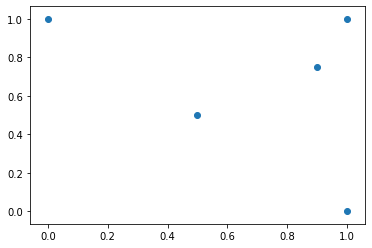

In [55]:
X = np.array([[0,1],[0.5,0.5], [0.9,0.75],[1,1],[1,0],])
plt.scatter(X[:,0], X[:,1])

In [56]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X)

array([[1.        , 0.70710678, 0.6401844 , 0.70710678, 0.        ],
       [0.70710678, 1.        , 0.99589321, 1.        , 0.70710678],
       [0.6401844 , 0.99589321, 1.        , 0.99589321, 0.76822128],
       [0.70710678, 1.        , 0.99589321, 1.        , 0.70710678],
       [0.        , 0.70710678, 0.76822128, 0.70710678, 1.        ]])

In [57]:
from scipy.spatial.distance import pdist
pdist(X, metric='cosine').reshape(2,5)

array([[2.92893219e-01, 3.59815600e-01, 2.92893219e-01, 1.00000000e+00,
        4.10679353e-03],
       [2.22044605e-16, 2.92893219e-01, 4.10679353e-03, 2.31778720e-01,
        2.92893219e-01]])

In [58]:
# Euclidean Distance
from scipy.spatial import distance
euclid = []
for i in range(len(X)):
    for j in range(len(X)):
        euclid.append(distance.euclidean(X[i],X[j]))
np.array(euclid).reshape(len(X),len(X))

array([[0.        , 0.70710678, 0.93407708, 1.        , 1.41421356],
       [0.70710678, 0.        , 0.47169906, 0.70710678, 0.70710678],
       [0.93407708, 0.47169906, 0.        , 0.26925824, 0.7566373 ],
       [1.        , 0.70710678, 0.26925824, 0.        , 1.        ],
       [1.41421356, 0.70710678, 0.7566373 , 1.        , 0.        ]])

In [59]:
from scipy.spatial.distance import pdist
pdist(X, metric='euclidean').reshape(2,5)

array([[0.70710678, 0.93407708, 1.        , 1.41421356, 0.47169906],
       [0.70710678, 0.70710678, 0.26925824, 0.7566373 , 1.        ]])

In [60]:
# Manhattan Distance
from scipy.spatial import distance

manhad = []
for i in range(len(X)):
    for j in range(len(X)):
        manhad.append(distance.cityblock(X[i],X[j]))
np.array(manhad).reshape(len(X),len(X))

array([[0.  , 1.  , 1.15, 1.  , 2.  ],
       [1.  , 0.  , 0.65, 1.  , 1.  ],
       [1.15, 0.65, 0.  , 0.35, 0.85],
       [1.  , 1.  , 0.35, 0.  , 1.  ],
       [2.  , 1.  , 0.85, 1.  , 0.  ]])

In [61]:
from scipy.spatial.distance import pdist
pdist(X, metric='cityblock').reshape(2,5)

array([[1.  , 1.15, 1.  , 2.  , 0.65],
       [1.  , 1.  , 0.35, 0.85, 1.  ]])

In [66]:
# mahalanobis distance (need to calculate inverse of covariate matrix in advance)
from scipy.spatial import distance

mahala = []

cov_matrix = np.cov(X)
#IV = np.linalg.inv(cov_matrix)
IV = np.linalg.pinv(cov_matrix)

for i in range(len(X)):
    for j in range(len(X)):
        mahala.append(distance.mahalanobis(X[i],X[j],IV))
        
np.array(mahala).reshape(len(X),len(X))

ValueError: shapes (2,) and (5,5) not aligned: 2 (dim 0) != 5 (dim 0)

In [65]:
IV

array([[ 0.48893704,  0.        , -0.07334056,  0.        , -0.48893704],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.07334056,  0.        ,  0.01100108,  0.        ,  0.07334056],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.48893704,  0.        ,  0.07334056,  0.        ,  0.48893704]])

In [49]:
from scipy.spatial.distance import pdist
pdist(X,'mahalanobis')

array([1.41421356, 1.80277564, 2.64575131, 2.82842712, 1.11803399,
       2.23606798, 1.41421356, 1.11803399, 1.80277564, 2.64575131])

In [ ]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(x.reshape(1,-1),y.reshape(1,-1))
print('Cosine similarity: %.3f' % cos_sim)


# Euclidean Distance
from scipy.spatial import distance
dst = distance.euclidean(x,y)
print(‘Euclidean distance: %.3f’ % dst)

# Manhattan Distance
from scipy.spatial import distance
dst = distance.cityblock(x,y)
print(‘Manhattan distance: %.3f’ % dst)


# mahalanobis distance (need to calculate inverse of covariate matrix in advance)
from scipy.spatial import distance
iv = [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]]
distance.mahalanobis([1, 0, 0], [0, 1, 0], iv)
distance.mahalanobis([0, 2, 0], [0, 1, 0], iv)
distance.mahalanobis([2, 0, 0], [0, 1, 0], iv)

### Check the SWEM
* [using the sentence shorter from the news site](https://www.testbig.com/forum/sentences-positivenegativeneutral-sentiment)

In [215]:
self_sentence_df = pd.DataFrame(np.array(['Mac pc is very useful.',  # opposite test
'Mac pc is terrible',    # opposite test
'Lisa is glad to help you',    # synonyms test
'Lisa is willing to help you', # synonyms test
'She said she is pleased to assist!',  # synonyms test 
"She doesn't want to help anyone.",    # synonyms + opposite test
'assist', # synonyms test 2
'help',   # synonyms test 2
'support',   # synonyms test 2
'aid',   # synonyms test 2
'love',   # synonyms test 3
'hate',   # synonyms test 3
'I love this car.',
'This view is amazing.',
'I feel great this morning.',
'I am so excited about the concert.',
'He is my best friend.',
'I do not like this car.',
'This view is horrible.',
'I feel tired this morning.',
'I am not looking forward to the concert.',
'He is my enemy.']), columns=['text'])

In [259]:
self_sentence_df = pd.DataFrame(np.array([
# topic
'Gender Discrimination',
# related topic 1 ('Gender Discrimination')
"Girls and women suffer most of the negative impact of rigid gender norms and roles - they are more likely to experience restrictions of their freedom and mobility, they experience epidemic levels of violence and harassment across the globe and have fewer opportunities to choose how to live their lives. But boys and men suffer too. Ideas about what it means to be a man force boys and men to behave in very limited ways which can harm them. Negative masculinities encouraged in boys serve to perpetuate the cycle of discrimination and inequality. Denying people the freedom to choose their path in life because of their gender prevents them from fulfilling their full potential. There is lots we can do to help build a more gender-equal world. Understanding the deep roots of gender inequality and challenging discrimination when we see it are the first steps. WHAT IS GENDER DISCRIMINATION? Gender discrimination describes the situation in which people are treated differently simply because they are male or female, rather than on the basis of their individual skills or capabilities. ",
# related topic 1.1 ('Gender Discrimination') ** whole text **
"CHALLENGING GENDER DISCRIMINATION: A HOW-TO GUIDE We are all influenced by gender. Gender norms (or rules) tell us what is appropriate for girls and for boys, women and men to do in our society. Because of gender stereotypes, girls and women are often less valued and have lower social status. Sophie (front) is a gender equality and sexual health campaigner from Uganda. She helped create the Girls Get Equal campaign. Sophie (front) is a 24-year-old sexual health and rights advocate from Uganda. She helped create the Girls Get Equal campaign.Girls and women suffer most of the negative impact of rigid gender norms and roles - they are more likely to experience restrictions of their freedom and mobility, they experience epidemic levels of violence and harassment across the globe and have fewer opportunities to choose how to live their lives. But boys and men suffer too. Ideas about what it means to be a man force boys and men to behave in very limited ways which can harm them. Negative masculinities encouraged in boys serve to perpetuate the cycle of discrimination and inequality.Denying people the freedom to choose their path in life because of their gender prevents them from fulfilling their full potential. There is lots we can do to help build a more gender-equal world. Understanding the deep roots of gender inequality and challenging discrimination when we see it are the first steps.WHAT IS GENDER DISCRIMINATION? Gender discrimination describes the situation in which people are treated differently simply because they are male or female, rather than on the basis of their individual skills or capabilities. The following is a list of discriminatory acts you may come across among your peers, at home, at school or in the workplace. Sexual harassment, catcalling Harassment and catcalling on the street are prime examples of how women’s right to walk freely around their environment is restricted. The normalisation of harassment and inaction of bystanders and authorities perpetuate this form of discrimination and limit women’s freedom. The Girls Get Equal campaign is taking off in India. Girls are advocating for gender equality from Canada to India. We're supporting them. Gender stereotypes at school and work Stereotypes are how societies expect people to act based on their gender. For example, girls should stay at home and help with housework and childcare, should dress modestly and not stay out late at night. People are often judged by how well they adhere to the gender stereotypes. These stereotypes can often bleed out into school and work, where girls are less likely to be encouraged into science and technology subjects or leadership roles, due to the perceived ‘male nature’ of these pursuits. Likewise, seemingly positive stereotypes and gender roles such as men being the ‘provider’ or ‘protector’ of the family, put an unnecessary burden on men and boys that could more positively be shared in an equal partnership. These attitudes limit girls’ power by rendering them less able to help contribute to making the world around them a better place. Objectification and poor representation Objectification is when a person is treated as a commodity or an object without regard to their personality or dignity. It commonly happens in the media where women are photoshopped and airbrushed leading to much more emphasis and value being put on their external appearance above other capacities. This affects girls’ body image, their self-esteem and ultimately the value they put on themselves. However, girls are also often represented poorly in entertainment and the media in ways that reinforce damaging gender stereotypes and traditional roles. Objectication must be called out and girls must be encouraged to tell their own stories - ones that reflect their power, potential and diversity. TAKE THE GIRLS GET EQUAL PLEDGE HOW CAN I CALL OUT GENDER DISCRIMINATION WHEN I SEE IT? 1. Speak out about your own experiences It’s important, if you feel comfortable, to call out your own experiences of discrimination. This could be highlighting sexist remarks made by your friends or peers or reporting harassment on public transport. It’s important to note that there are dangers associated with calling others out on their behaviour. People may not like to have their viewpoints challenged; they may react in a negative or aggressive way, so if your instincts tells you that a situation is too risky, your own safety is the priority. Often the best course of action when discrimination is experienced is to alert an authority figure - a member of staff on public transport, or where relevant your teacher or your boss. The more they are made aware these issues are happening, the more they’ll be encouraged to step in and be part of the solution. 2. Call out discrimination in the media and advertising Write to advertisers, marketers and media outlets if you come across stories that portray women and girls in a reductive or unfair way. Are there gender stereotypes in your textbooks at school? Does an advert in your city objectify women? Does a film you’ve watched have fewer speaking roles for women? Find out who is responsible and write to them to let them know your thoughts. Also - vote with your feet. Don’t support entertainment that is disrespectful to girls and women and doesn’t represent their true power, potential, talent and diversity.  Boys in Sri Lanka are gender equality allies  Boys in Sri Lanka are supporting Girls Get Equal as allies. 3. Support other campaigners A great way to make a big effect in the pursuit of gender equality is to join wath others. Seek out local campaign groups. Join or set up school or university societies for gender equality and female leadership. There is strength in numbers - more voices tackling a particular issue means they are more likely to be heard. Helping to raise the profile of campaigns by other marginalised groups is a vital part of ending discrimination. For example, girls from a minority or indigenous community may experience racism as well as sexism, and members of the LGBTIQ+ community may also be experiencing homophobia. Be their allies and lend your voice to their causes. 4. It’s OK to not challenge discrimination every time you see it As mentioned above, sometimes calling out discrimination can carry risks. It’s not your job alone to fix the world. We are all part of the same movement. Just changing how we relate with others, and demanding that others do the same, will not end gender inequality. Lasting change will only happen if the institutions that affect our lives also change. Don’t feel defeated by these big obstacles - each small achievement is an extra step towards our shared goal. Caring for ourselves means we can continue to advocate for gender equality so always make sure you are maintaining your own wellbeing.",
# related topic 2  ('Gender Discrimination')
"Gender discrimination plays out in two sequences. The first one is the immediate disappearance of girls at birth (or during early childhood) while the second one refers to future demographic disturbances among adults. The routine elimination of girls before their birth is no doubt the most extreme symptom of women's contemporary undervaluation that goes well beyond all other forms of discrimination. Since Amartya Sen's pioneer paper on missing women (Sen, 1990), we can measure the extent of the resulting gap across populations. Within families, the imbalance is mostly invisible since parents who abort female fetuses often have had prior girls. But when compared across larger communities, figures point inescapably to a surplus of boys. It is in fact possible to get a better idea of the actual rift between male and female by using demographic estimates on the age and sex distribution for entire populations. ‘Missing women’ are women that ought to be found in population censuses if the sex distribution was not skewed toward men. By applying sex ratios by age computed for nondiscriminating countries, from Latin America to Europe, and correcting for age and mortality variations, it is possible to assess the number of women that are apparently missing from demographic records in Asia and Eastern Europe.",
# related topic 3  ('Gender Discrimination')
"Sexual harassment can be based on an individual’s perception of the events in question. Conduct (verbal and/or physical) that is based on sex or gender and that is not welcome can constitute sexual harassment. Grievance procedures consistent with the principles of due process have been developed and implemented for faculty and staff, including Administrative and Professional employees, as well as classified staff. Grievance procedures are available for students in the Office of the Vice President for Student Affairs. Grievance procedures for faculty and staff are included in the Faculty Handbook and the Staff Handbook. ",
# unrelated topic 1 (Economic Growth)
"Economic growth is an increase in the production of goods and services over a specific period. To be most accurate, the measurement must remove the effects of inflation. Economic growth creates more profit for businesses. As a result, stock prices rise. That gives companies capital to invest and hire more employees. As more jobs are created, incomes rise. Consumers have more money to buy additional products and services. Purchases drive higher economic growth. For this reason, all countries want positive economic growth. This makes economic growth the most-watched economic indicator.",
# unrelated topic 2 (Stress Management)
"What happens when we continue “burning the candle at both ends” until we reach physical and emotional exhaustion? Just like the candle itself, we risk burning ourselves out. There is a parable of a frog sitting in a pot on the stove. If dropped into a pot of boiling water, a frog would likely notice and try to escape. But when placed in a pot that is slowly approaching a boil, the frog doesn’t notice until the water has already reached an unbearable heat—at which point it is too hot for the frog to survive. Have you ever experienced a slow acceptance of the pressures around you, until everything is “just too much” and you can barely cope? If so, you’re not alone. About 8.3 million American adults were reported to have experienced serious psychological distress in 2017 (“More Americans suffering from stress, anxiety, and depression, study finds,” 2018). So what if we could notice the boiling signs earlier and even “turn down” the heat? If stress “has become one of the most serious health issues of the 20th century and a worldwide epidemic,” then it is time to start growing the tools of how we handle stress (“Workplace Stress,” 2018).",
# unrelated topic 3
"The number of foreign workers in Japan has been rising steadily in recent years. Now, in the midst of the coronavirus outbreak and the most rapid economic downturn since the 2008 financial crisis, many are struggling and one Tokyo-based NPO has been busy fielding calls for help.Counselors at non-profit organization POSSE provide free labor advice in Japanese and English. One of those counselors, Iwahashi Makoto, says they usually get a handful of inquiries each month. But last month the number shot up to 100. Iwahashi Makoto, a counselor at non-profit organization POSSE.Iwahashi says many inquiries came from instructors at foreign language schools in early March. Those schools canceled their classes after Japan’s government called for the closure of elementary, junior high and high schools from March 2. Many instructors were told to stay at home on standby, and they saw their income nosedive. Even if classes took place, instructors complained about a lack of protective measures at their schools, including a failure to press students to wear masks. Later in the month, people in the tourism industry, including receptionists and cleaners at hotels, as well as part-time workers at restaurants and pubs, turned to POSSE for advice. Many of those workers came to Japan from other parts of Asia. Some told counselors their shifts have been cut and their income had dropped sharply. Others said they were facing pressure to quit their jobs as employers cited shrinking sales. For some, the income drop means they can no longer afford to live in Japan."
]), columns=['text'])

In [260]:
self_sentence_df['text_clean'] = self_sentence_df['text'].map(lambda x: text_cleansing(x))
self_sentence_df['text_clean_non_include'] = self_sentence_df['text'].map(lambda x: text_cleansing(x, True))

In [261]:
self_sentence_df

,text,text_clean,text_clean_non_include
0,Gender Discrimination,gender discrimination,gender discrimination
1,"Girls and women suffer most of the negative impact of rigid gender norms and roles - they are more likely to experience restrictions of their freedom and mobility, they experience epidemic levels of violence and harassment across the globe and have fewer opportunities to choose how to live their lives. But boys and men suffer too. Ideas about what it means to be a man force boys and men to behave in very limited ways which can harm them. Negative masculinities encouraged in boys serve to per...",girl woman suffer negative impact rigid gender norm role likely experience restriction freedom mobility experience epidemic level violence harassment across globe fewer opportunity choose live lives boy men suffer too idea mean man force boy men behave limit way harm them negative masculinity encourage boy serve perpetuate cycle discrimination inequality deny people freedom choose path life gender prevent fulfil full potential lot help build genderequal world understand deep root gender ine...,girl woman suffer negative impact rigid gender norm role likely experience restriction freedom mobility experience epidemic level violence harassment across globe fewer opportunity choose live lives boy men suffer too idea mean man force boy men behave limit way harm them negative masculinity encourage boy serve perpetuate cycle discrimination inequality deny people freedom choose path life gender prevent fulfil full potential lot help build genderequal world understand deep root gender ine...
2,"CHALLENGING GENDER DISCRIMINATION: A HOW-TO GUIDE We are all influenced by gender. Gender norms (or rules) tell us what is appropriate for girls and for boys, women and men to do in our society. Because of gender stereotypes, girls and women are often less valued and have lower social status. Sophie (front) is a gender equality and sexual health campaigner from Uganda. She helped create the Girls Get Equal campaign. Sophie (front) is a 24-year-old sexual health and rights advocate from Ugand...",challenge gender discrimination howto guide influence gender gender norm or rules tell u appropriate girl boys woman men society gender stereotypes girl woman often le value lower social status sophie front gender equality sexual health campaigner uganda help create girl get equal campaign sophie front 24yearold sexual health right advocate uganda help create girl get equal campaigngirls woman suffer negative impact rigid gender norm role likely experience restriction freedom mobility exper...,challenge gender discrimination howto guide influence gender gender norm or rules tell u appropriate girl boys woman men society gender stereotypes girl woman often le value lower social status sophie front gender equality sexual health campaigner uganda help create girl get equal campaign sophie front 24yearold sexual health right advocate uganda help create girl get equal campaigngirls woman suffer negative impact rigid gender norm role likely experience restriction freedom mobility exper...
3,"Gender discrimination plays out in two sequences. The first one is the immediate disappearance of girls at birth (or during early childhood) while the second one refers to future demographic disturbances among adults. The routine elimination of girls before their birth is no doubt the most extreme symptom of women's contemporary undervaluation that goes well beyond all other forms of discrimination. Since Amartya Sen's pioneer paper on missing women (Sen, 1990), we can measure the extent of ...",gender discrimination play two sequences first one immediate disappearance girl birth or early childhood second one refer future demographic disturbance among adults routine elimination girl birth doubt extreme symptom womens contemporary undervaluation go well beyond form discrimination since amartya sens pioneer paper miss woman sen 1990 measure extent result gap across populatio

In [277]:
# essay vectorization (300 components)
essay_v = []
essay_v_not =[]

for essay in self_sentence_df['text_clean']:
    essay_v.append(swem_agg_vector(essay.split(' '), word2vec_base, 'max'))

for essay in self_sentence_df['text_clean_non_include']:
    essay_v_not.append(swem_agg_vector(essay.split(' '), word2vec_base, 'max'))

In [278]:
target_index = 0

cosine_distance = {}
cosine_distance_not = {}
for idx in range(len(essay_v)):
    cosine_distance[idx] = cos_similarity(essay_v[idx], essay_v[target_index])
    cosine_distance_not[idx] = cos_similarity(essay_v_not[idx], essay_v_not[target_index])

In [279]:
print('target_index = {}'.format(target_index))
final_df = pd.concat([self_sentence_df, pd.DataFrame.from_dict(cosine_distance, orient='index', columns=['d']),
pd.DataFrame.from_dict(cosine_distance_not, orient='index', columns=['d_not'])], axis=1)
final_df.sort_values(ascending=False, by='d')

target_index = 0


,text,text_clean,text_clean_non_include,d,d_not
0,Gender Discrimination,gender discrimination,gender discrimination,1.000000,1.000000
1,"Girls and women suffer most of the negative impact of rigid gender norms and roles - they are more likely to experience restrictions of their freedom and mobility, they experience epidemic levels of violence and harassment across the globe and have fewer opportunities to choose how to live their lives. But boys and men suffer too. Ideas about what it means to be a man force boys and men to behave in very limited ways which can harm them. Negative masculinities encouraged in boys serve to per...",girl woman suffer negative impact rigid gender norm role likely experience restriction freedom mobility experience epidemic level violence harassment across globe fewer opportunity choose live lives boy men suffer too idea mean man force boy men behave limit way harm them negative masculinity encourage boy serve perpetuate cycle discrimination inequality deny people freedom choose path life gender prevent fulfil full potential lot help build genderequal world understand deep root gender ine...,girl woman suffer negative impact rigid gender norm role likely experience restriction freedom mobility experience epidemic level violence harassment across globe fewer opportunity choose live lives boy men suffer too idea mean man force boy men behave limit way harm them negative masculinity encourage boy serve perpetuate cycle discrimination inequality deny people freedom choose path life gender prevent fulfil full potential lot help build genderequal world understand deep root gender ine...,0.890757,0.890757
3,"Gender discrimination plays out in two sequences. The first one is the immediate disappearance of girls at birth (or during early childhood) while the second one refers to future demographic disturbances among adults. The routine elimination of girls before their birth is no doubt the most extreme symptom of women's contemporary undervaluation that goes well beyond all other forms of discrimination. Since Amartya Sen's pioneer paper on missing women (Sen, 1990), we can measure the extent of ...",gender discrimination play two sequences first one immediate disappearance girl birth or early childhood second one refer future demographic disturbance among adults routine elimination girl birth doubt extreme symptom womens contemporary undervaluation go well beyond form discrimination since amartya sens pioneer paper miss woman sen 1990 measure extent result gap across populations within families imbalance mostly invisible since parent abort female fetus often prior girls compare across l...,gender discrimination play two sequences first one immediate disappearance girl birth or early childhood second one refer future demographic disturbance among adults routine elimination girl birth doubt extreme symptom womens contemporary undervaluation go well beyond form discrimination since amartya sens pioneer paper miss woman sen 1990 measure extent result gap across populations within families imbalance mostly invisible since parent abort female fetus often prior girls compare across l...,0.883032,0.883032
2,"CHALLENGING GENDER DISCRIMINATION: A HOW-TO GUIDE We are all influenced by gender. Gender norms (or rules) tell us what is appropriate for girls and for boys, women and men to do in our society. Because of gender stereotypes, girls and women are often less valued and have lower social status. Sophie (front) is a gender equality and sexual health campaigner from Uganda. She helped create the Girls Get Equal campaign. Sophie (front) is a 24-year-old sexual health and rights advocate from Ugand...",challenge gender discrimination howto guide influence gender gender norm or rules tell u appropriate girl boys woman men society gender stereotypes girl woman often le value lower social status sophie front gender equality sexual health campaigner uganda help create girl get equal campaign sophie front 24yearold sexual

In [214]:
final_df.sort_values(ascending=False, by='d_not')

,text,text_clean,text_clean_non_include,d,d_not
6,assist,assist,assist,1.000000,1.000000
7,help,help,help,0.564128,0.564128
4,She said she is pleased to assist!,say please assist,say please assist,0.351765,0.351765
9,aid,aid,aid,0.313503,0.313503
8,support,support,support,0.305955,0.305955
5,She doesn't want to help anyone.,want help anyone,doesnt want help anyone,0.192835,0.192835
3,Lisa is willing to help you,lisa will help,lisa will help,0.133535,0.133535
2,Lisa is glad to help you,lisa glad help,lisa glad help,0.096889,0.096889
11,This view is amazing.,view amazing,view amazing,0.092133,0.092133
0,Mac pc is very useful.,mac pc useful,mac pc useful,0.091802,0.091802


In [221]:
word2vec_base.most_similar('love')

[('loved', 0.6907792091369629),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100709438323975),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('Ilove', 0.5702950954437256),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547305345535278),
 ('absolutely_adore', 0.5536840558052063)]

In [232]:
word2vec_base.most_similar('happy', topn=20)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596),
 ('happier', 0.6244627237319946),
 ('Said_Hirschbeck', 0.6234508752822876),
 ('elated', 0.6196017861366272),
 ('thankful', 0.6178935766220093),
 ('unhappy', 0.6128038167953491),
 ('enthused', 0.6084051132202148),
 ('chuffed', 0.5918744802474976),
 ('grateful', 0.5918135643005371),
 ('confident', 0.589353084564209),
 ('hapy', 0.5783905982971191)]

* It looks that "word similarity (distance)" does not include sentiment. Probably only share the similar structute or category only.
* That's why using wrod2vec here doen not increase the accuracy of the model.
* The more words of one text, the lower detection rate?

#### TODO:
1. Paragraph vector (SWEM)?
2. Use the new X to fit RF model and compare
3. Cosine Similarity vs. K-means Difference (then compare sentiment)
        * T-SNE or SVD 2-dimension plot  vs. sentiment
        * Other distance
4. Bert

In [226]:
cos_similarity(np.array([1, 2, 4]), 10 * np.array([1,2,4]))

0.9999999975996033

In [284]:
cos_similarity(word2vec_base['trump'], word2vec_base['Trump'])

0.15639442

In [4]:
from tqdm import tqdm 

for i in tqdm(range(10)):
    print(i)

100%|██████████| 10/10 [00:00<00:00, 7463.17it/s]

0
1
2
3
4
5
6
7
8
9
